In [1]:
from sympy.abc import *
from sympy.solvers import solve
import sympy as s

In [24]:
r,x,m,d,K = symbols('r x m d K')

In [30]:
temp = s.simplify(((x)/(m**2))*((1/(s.pi*(d**3)))*s.ln(s.sqrt(d**2+(x)**2)/(x))-1/(2*s.pi*d*(x)**2)) + (s.sqrt(d**2+(x)**2)-d)/(x)-x/K)

In [32]:
answer = solve(temp)

In [33]:
temp

-d/x + sqrt(d**2 + x**2)/x - 1/(2*pi*d*m**2*x) + x*log(sqrt(d**2 + x**2)/x)/(pi*d**3*m**2) - x/K

In [35]:
answer[0][K]

2*pi*d**3*m**2*x**2/(-2*pi*d**4*m**2 + 2*pi*d**3*m**2*sqrt(d**2 + x**2) - d**2 + 2*x**2*log(sqrt(d**2 + x**2)/x))

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [225]:

def r_Case1(x,m,d):
    O_p = (4/np.pi)*np.sqrt(x/m)
    t_p = np.arcsin(O_p/x)
    pi = np.pi
    r_lock1 = (x/m**2)*((1/(pi*d**3))*np.log(np.sqrt(d**2+O_p**2)/O_p)-1/(2*pi*d*O_p**2))
    r_drift1 = (2/(pi*x))*(np.sqrt(d**2+x**2)*np.arctan(np.sqrt(d**2+x**2)*np.tan(t_p))-d*t_p)
    return r_lock1+r_drift1

r_Case2 = lambda x,m,d:(x/(m**2))*((1/np.pi*d**3)*np.log(np.sqrt(d**2+x**2)/(x))-1/(2*np.pi*d*x**2))+(np.sqrt(d**2+x**2)-d)/x

In [297]:
r = np.linspace(0.001,1,5000)
K = np.linspace(0.001,13,5000)
RR,KK = np.meshgrid(r,K)

x = RR*KK
d = 1
m = 2

C:\Users\kim9y\AppData\Local\Temp\ipykernel_35016\1535872144.py:3: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


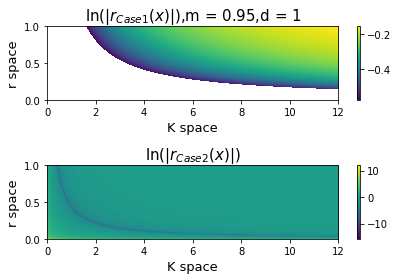

In [286]:
# plt.imshow(x,origin="lower")

# plt.imshow(np.log(abs(r_Case1(x,6,1))).T,origin="lower",extent=[0,12,0,1])
plt.subplot(211)
plt.imshow(np.log(abs(r_Case1(x,m,d))).T,origin="lower",extent=[0,12,0,1],aspect='auto')
plt.colorbar()
plt.xlabel("K space",fontsize=13)
plt.ylabel("r space",fontsize=13)
plt.title("$\ln(|r_{Case1}(x)|)$,"+f"m = {m},d = {d}",fontsize=15)
plt.subplot(212)
case2 = plt.imshow(np.log(abs(r_Case2(x,m,d))).T,origin="lower",extent=[0,12,0,1],aspect='auto')
plt.xlabel("K space",fontsize=13)
plt.ylabel("r space",fontsize=13)
plt.title("$\ln(|r_{Case2}(x)|)$",fontsize=15)
plt.colorbar()
plt.tight_layout()

plt.savefig(f"Review2/m={m}, d={d} r(case1,2) in r K space.png",dpi=400)

In [267]:
X = np.linspace(0.001,30,5000)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_35016\1535872144.py:3: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


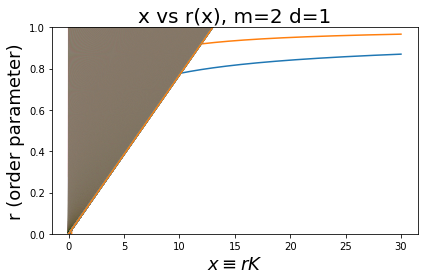

In [298]:
K_list1 =[]
R_list1 =[]
K_list2 =[]
R_list2 =[]
plt.plot(X,r_Case1(X,m,d),label='Case 1')
plt.plot(X,r_Case2(X,m,d),label='Case 2')
for K_  in  K[::1]:
    i=0
    plt.plot(X,X/K_)
    i+=1
    TEMP_2 = (X/K_)[abs(r_Case2(X,m,d)-X/K_)<1e-3]
    if len(TEMP_2)!=0:
        for R_ in TEMP_2:
            K_list2.append(K_)
            R_list2.append(R_)
    TEMP_1 = (X/K_)[abs(r_Case1(X,m,d)-X/K_)<1e-3]
    if len(TEMP_1)!=0:
        for R_ in TEMP_1:
            K_list1.append(K_)
            R_list1.append(R_)
# plt.plot(X,X/K)
plt.ylim(0,1)
# plt.xlim(1)
# plt.legend(fontsize=12)
plt.xlabel("$x \equiv rK$",fontsize=18)
plt.ylabel("r (order parameter)",fontsize=18)
plt.title(f"x vs r(x), m={m} d={d}",fontsize=20)
plt.tight_layout()
# plt.savefig(f"Review2/m={m}, d={d} x vs r(x).png",dpi=400)

In [ ]:
K_list1 =[]
R_list1 =[]
K_list2 =[]
R_list2 =[]
plt.plot(X,r_Case1(X,m,d),label='Case 1')
plt.plot(X,r_Case2(X,m,d),label='Case 2')
for K_  in  K[1000::2000]:
    i=0
    plt.plot(X,X/K_,alpha=1,label=f"Slope(1/K) = 1/{K_:.02f}",lw=2)
    i+=1
    TEMP_2 = (X/K_)[abs(r_Case2(X,m,d)-X/K_)<1e-3]
    if len(TEMP_2)!=0:
        for R_ in TEMP_2:
            K_list2.append(K_)
            R_list2.append(R_)
    TEMP_1 = (X/K_)[abs(r_Case1(X,m,d)-X/K_)<1e-3]
    if len(TEMP_1)!=0:
        for R_ in TEMP_1:
            K_list1.append(K_)
            R_list1.append(R_)
# plt.plot(X,X/K)
plt.ylim(0,1)
# plt.xlim(1)
plt.legend(fontsize=12)
plt.xlabel("$x \equiv rK$",fontsize=18)
plt.ylabel("r (order parameter)",fontsize=18)
plt.title(f"x vs r(x), m={m} d={d}",fontsize=20)
plt.tight_layout()
plt.savefig(f"Review2/m={m}, d={d} x vs r(x) K_1.png",dpi=400)

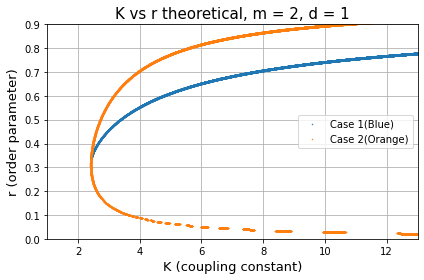

In [299]:
plt.plot(K_list1,R_list1,'.',markersize=1,label="Case 1(Blue)")
plt.plot(K_list2,R_list2,'.',markersize=1,label="Case 2(Orange)")

plt.xlim(1,13)
plt.ylim(0,0.9)
plt.xlabel("K (coupling constant)",fontsize=13)
plt.ylabel("r (order parameter)",fontsize=13)
plt.title(f"K vs r theoretical, m = {m}, d = {d}",fontsize=15)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(f"Review2/m={m}, d={d} K vs r.png",dpi=400)


In [68]:
K

array([ 0.        ,  0.01201201,  0.02402402,  0.03603604,  0.04804805,
        0.06006006,  0.07207207,  0.08408408,  0.0960961 ,  0.10810811,
        0.12012012,  0.13213213,  0.14414414,  0.15615616,  0.16816817,
        0.18018018,  0.19219219,  0.2042042 ,  0.21621622,  0.22822823,
        0.24024024,  0.25225225,  0.26426426,  0.27627628,  0.28828829,
        0.3003003 ,  0.31231231,  0.32432432,  0.33633634,  0.34834835,
        0.36036036,  0.37237237,  0.38438438,  0.3963964 ,  0.40840841,
        0.42042042,  0.43243243,  0.44444444,  0.45645646,  0.46846847,
        0.48048048,  0.49249249,  0.5045045 ,  0.51651652,  0.52852853,
        0.54054054,  0.55255255,  0.56456456,  0.57657658,  0.58858859,
        0.6006006 ,  0.61261261,  0.62462462,  0.63663664,  0.64864865,
        0.66066066,  0.67267267,  0.68468468,  0.6966967 ,  0.70870871,
        0.72072072,  0.73273273,  0.74474474,  0.75675676,  0.76876877,
        0.78078078,  0.79279279,  0.8048048 ,  0.81681682,  0.82